In [1]:
#Benjamin Schreyer benontheplanet@gmail.com

#TODO:
#RungeKutta aribtrary precision in compiled language




import matplotlib.pyplot as plt
from mpmath import mpmathify
import mpmath as mp
import numpy as np
import math
import time

from functions_bending_schreyer import *

###
### Need to look at Green's function iteration methods, it seems like this could work, certainly
### for the case of constantI(s)

#https://www.johndcook.com/blog/2020/02/13/runge-kutta-methods/
#https://nodepy.readthedocs.io/en/latest/modules/runge_kutta_method.html#nodepy.runge_kutta_method.DC
#https://ntrs.nasa.gov/api/citations/19710018627/downloads/19710018627.pdf

![title](jpdesign.png)

0.0 1.33292501337782e-8 6.30896327319097 regula falsi
5.40666970830612e-10 1.33292501337782e-8 -12.2218029868334 regula falsi
5.40666970830612e-10 -1.18042965856866e-8 -7.41129501177627 regula falsi
5.40666970830612e-10 -3.32919134492558e-9 -6.36349549630723 regula falsi
5.40666970830612e-10 -1.09777629763983e-9 -6.29163314013313 regula falsi
5.40666970830612e-10 -2.10383551003411e-10 6.29093319196505 regula falsi
1.94427415611509e-10 -2.10383551003411e-10 6.27952184869765 regula falsi
8.11937628397966e-12 -2.10383551003411e-10 -6.28651824109943 regula falsi
8.11937628397966e-12 -9.23361859443025e-11 -6.28384729476694 regula falsi
8.11937628397966e-12 -3.80833345599055e-11 -6.28124268574398 regula falsi
8.11937628397966e-12 -1.31352389185197e-11 -6.26376248745917 regula falsi
8.11937628397966e-12 -1.66040364993081e-12 6.27437270737571 regula falsi
3.61318394322558e-12 -1.66040364993081e-12 6.25591283583354 regula falsi
1.1844607084959e-12 -1.66040364993081e-12 -6.02146868784532 regula 

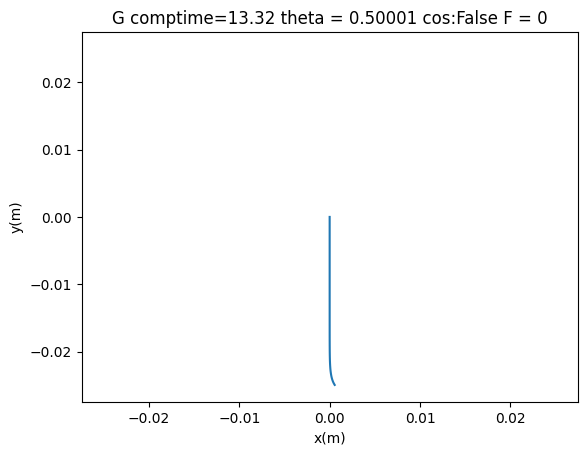

0.0 2.66585002675564e-9 6.28387762992539 regula falsi
3.85741630680978e-11 2.66585002675564e-9 -12.551626878397 regula falsi
3.85741630680978e-11 -2.58693675273448e-8 -11.6542748473676 regula falsi
3.85741630680978e-11 -8.46725274408838e-9 -7.06227885372061 regula falsi
3.85741630680978e-11 -2.89366720358128e-9 -6.39949481256735 regula falsi
3.85741630680978e-11 -1.32006581803688e-9 -6.31462749824207 regula falsi
3.85741630680978e-11 -6.23841406952498e-10 -6.295090779573 regula falsi
3.85741630680978e-11 -2.86567334553412e-10 -6.28777677815809 regula falsi
3.85741630680978e-11 -1.21266864291814e-10 -6.28396726297399 regula falsi
3.85741630680978e-11 -4.00501230719739e-11 -5.99502643402091 regula falsi
3.85741630680978e-11 -1.12100835838386e-13 6.28224753748537 regula falsi
1.90910625653926e-11 -1.12100835838386e-13 6.28012421557135 regula falsi
9.42126860911877e-12 -1.12100835838386e-13 6.27636673674484 regula falsi
4.62153872843296e-12 -1.12100835838386e-13 6.26882178810248 regula fal

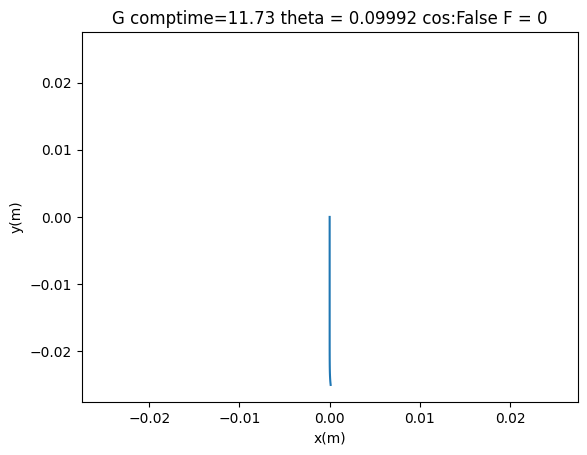

In [2]:
theta_test = [0.5, 0.1]

cos_test = [False]
F_test = [423*10**-6]

N = 0
T = 0
N_Passed = 0
for thet in theta_test:
    for cos in cos_test:
        for Fs in F_test:
        #Cosine only bending demo
            tol =  mpmathify(0.001)
            Sf = 25 * 10**-3 #25mm
            S = mpmathify("1E-2")
            E = mpmathify("280E9")
            #To find a bending of angle theta:
            #If F is zero, do a search on F2
            #If F is nonzero and F2 is zero do a search on M0
            #If both F and F2 are nonzero do a search on F2
            

            
            #Define geometry of the flexure
            def If(s):
                return 1/12 * 1.8 * 10**-6 * (25*10**-6)**3 * (s + 10) / (s + 10)
            
            def I(s):
                return mpmathify(If(float(s)))
            
            grid = mp.matrix(np.linspace(0,Sf,100))
            #print(grid)
            #print(grid[len(grid) - 1],"GRID last entry")
            Isamples = mp.matrix(If(np.linspace(0,Sf,100)))
            #floating precision
            mp.dps = 40
            
            
            
            Ti = time.time_ns()
            S, F, Es = bend_samples(grid, Isamples, order = 4, E = E, Fsin = mpmathify(Fs), Fcos = cos, theta0 = mpmathify(thet), tol = tol)
            Tf = time.time_ns()

            S = np.array(S, dtype = "float")
            F = np.array(F, dtype = "float")
            Es = np.array(Es, dtype = "float")
            #plt.plot(S,F[:,-2])
            #plt.title("Angle over the fiber")
            #plt.show()
            #plt.title("Error")
            #plt.plot(S,Es[:,-2])

            
            xs,zs = integrate_xz([x[1] for x in list(F)],S)
            #plot limits to give perceived geometry
            lm = [-1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))]),1.1*np.max([np.max(np.abs(xs)),np.max(np.abs(zs))])]
            
            plt.xlim(lm)
            plt.ylim(lm)
            plt.plot(xs,zs)
            #Small total angle error and tolerance for end angle met?
            PASSED = np.sum(np.abs(Es[:,-2])) < thet * tol and  np.sum(np.abs(Es[:,-2])) < 0.015 and np.abs(F[-1,-2] - mpmathify(thet))/ mpmathify(thet) < tol
            
            T += (Tf-Ti)/10**9
            N +=1
            if PASSED:
                N_Passed += 1
                PASSED = "G"
            else:
                PASSED = "X"
            plt.title(PASSED+ " comptime="+str(round((Tf-Ti)/10**9,2))+" theta = " + str(round(F[-1][-2],5)) + " cos:" + str(cos) + " F = " + str(round(Fs)) )
            plt.xlabel("x(m)")
            plt.ylabel("y(m)")
            plt.show()
            



In [3]:
print(N, N_Passed, "in ", T / N," average time (s) per bend")

2 2 in  12.5219093295  average time (s) per bend
